In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/city_day.csv")

In [ ]:

df.isnull().sum()

City             0
Date             0
PM2.5          765
PM10          1861
NO             590
NO2            598
NOx            694
NH3           1721
CO             341
SO2            641
O3             670
Benzene        938
Toluene       1344
Xylene        3021
AQI            798
AQI_Bucket     798
dtype: int64

In [ ]:
# Assuming df is your DataFrame containing air quality data

# Fill NaN values with the mean of each column
df2 = df.fillna(df.mean())

# Alternatively, you can fill NaN values with the median of each column
# df_filled = df.fillna(df.median())

# If you want to fill NaN values with a specific value, such as 0, you can do:
# df_filled = df.fillna(0)

# If you want to fill NaN values with a specific value for each column, you can use a dictionary
# For example, to fill NaN values in the 'PM2.5' column with the mean of that column, and 'PM10' column with the median:
# fill_values = {'PM2.5': df['PM2.5'].mean(), 'PM10': df['PM10'].median()}
# df_filled = df.fillna(fill_values)

# If you want to fill NaN values with the previous valid value in the column, you can use the method 'ffill' (forward fill)
# df_filled = df.fillna(method='ffill')

# If you want to fill NaN values with the next valid value in the column, you can use the method 'bfill' (backward fill)
# df_filled = df.fillna(method='bfill')

# This will fill NaN values with the mean of each column and store the result in df_filled


<ipython-input-13-06186f499cb5>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2 = df.fillna(df.mean())


In [ ]:
df2

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
5,Ahmedabad,2015-01-06,67.584391,118.118552,45.41,38.48,81.50,23.708306,45.41,45.76,46.51,5.42,10.83,1.93,167.310696,NaN
11,Ahmedabad,2015-01-12,67.584391,118.118552,52.04,40.67,90.24,23.708306,52.04,51.84,45.89,2.41,0.03,7.88,167.310696,NaN
17,Ahmedabad,2015-01-18,67.584391,118.118552,6.10,25.77,29.57,23.708306,6.10,48.43,53.49,0.74,0.21,2.75,167.310696,NaN
23,Ahmedabad,2015-01-24,67.584391,118.118552,2.03,20.39,21.40,23.708306,2.03,40.07,32.49,0.47,0.70,1.54,167.310696,NaN
29,Ahmedabad,2015-01-30,79.840000,118.118552,13.85,28.68,41.08,23.708306,13.85,48.49,97.07,0.04,0.00,4.81,328.000000,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29501,Visakhapatnam,2020-06-02,9.910000,43.300000,2.81,19.91,12.60,9.160000,0.47,8.78,19.68,1.37,3.44,0.73,50.000000,Good
29507,Visakhapatnam,2020-06-08,31.140000,125.150000,6.55,41.56,27.26,9.710000,0.64,6.61,36.65,3.47,9.76,1.78,115.000000,Moderate
29513,Visakhapatnam,2020-06-14,21.330000,83.230000,2.81,34.56,20.43,9.780000,0.58,9.37,29.44,2.29,5.91,0.97,88.000000,Satisfactory
29519,Visakhapatnam,2020-06-20,26.670000,86.290000,3.78,37.36,22.46,15.050000,0.74,11.76,41.97,3.14,11.89,1.87,74.000000,Satisfactory


In [ ]:
df = df[5::6]


In [ ]:
df2.isnull().sum()

City            0
Date            0
PM2.5           0
PM10            0
NO              0
NO2             0
NOx             0
NH3             0
CO              0
SO2             0
O3              0
Benzene         0
Toluene         0
Xylene          0
AQI             0
AQI_Bucket    798
dtype: int64

<Axes: >

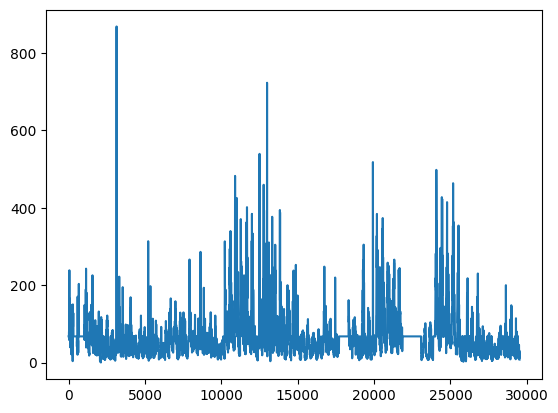

In [ ]:
temp = df2['PM2.5']
temp.plot()

In [ ]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df2, window_size=5):
  df2_as_np = df2.to_numpy()
  X = []
  y = []
  for i in range(len(df2_as_np)-window_size):
    row = [[a] for a in df2_as_np[i:i+window_size]]
    X.append(row)
    label = df2_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((4916, 5, 1), (4916,))

In [ ]:
X_train1, y_train1 = X1[:60000], y1[:60000]
X_val1, y_val1 = X1[:], y1[:]
X_test1, y_test1 = X1[65000:], y1[65000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((4916, 5, 1), (4916,), (4916, 5, 1), (4916,), (0, 5, 1), (0,))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
154/154 [==============================] - 6s 38ms/step - loss: 6909.1382 - root_mean_squared_error: 83.1212 - val_loss: 6584.3203 - val_root_mean_squared_error: 81.1438
Epoch 2/10
154/154 [==============================] - 4s 27ms/step - loss: 6272.5610 - root_mean_squared_error: 79.1995 - val_loss: 5977.1045 - val_root_mean_squared_error: 77.3117
Epoch 3/10
154/154 [==============================] - 5s 32ms/step - loss: 5743.0762 - root_mean_squared_error: 75.7831 - val_loss: 5540.2549 - val_root_mean_squared_error: 74.4329
Epoch 4/10
154/154 [==============================] - 4s 29ms/step - loss: 5388.8970 - root_mean_squared_error: 73.4091 - val_loss: 5245.1245 - val_root_mean_squared_error: 72.4232
Epoch 5/10
154/154 [==============================] - 5s 29ms/step - loss: 5117.6182 - root_mean_squared_error: 71.5375 - val_loss: 4990.5698 - val_root_mean_squared_error: 70.6440
Epoch 6/10
154/154 [==============================] - 5s 31ms/step - loss: 4873.2715 - root_mea

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [ ]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

154/154 [==============================] - 1s 2ms/step


,Train Predictions,Actuals
0,42.827427,58.36
1,42.684814,66.52
2,42.771511,80.61
3,42.829075,238.41
4,42.863632,61.12
...,...,...
4911,39.944763,9.91
4912,34.489292,31.14
4913,40.913189,21.33
4914,38.609383,26.67


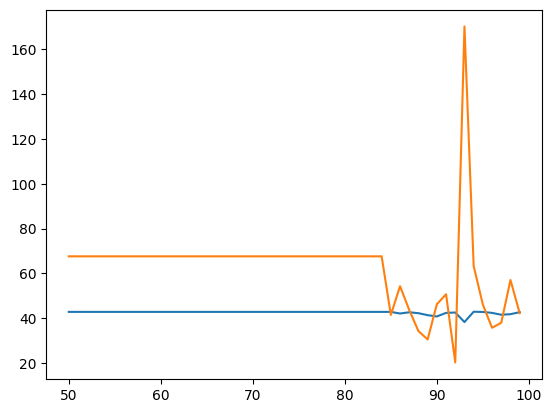

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [ ]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

154/154 [==============================] - 1s 4ms/step


,Val Predictions,Actuals
0,42.827427,58.36
1,42.684814,66.52
2,42.771511,80.61
3,42.829075,238.41
4,42.863632,61.12
...,...,...
4911,39.944763,9.91
4912,34.489292,31.14
4913,40.913189,21.33
4914,38.609383,26.67


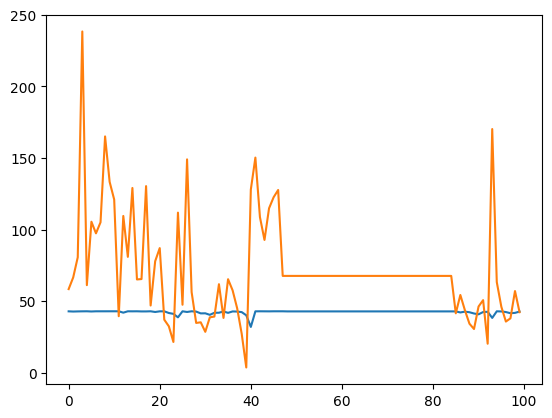

In [ ]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [ ]:
# Split